In [1]:
# dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# load excel file
file_path = os.path.join('..','raw_data','2007-2017-PIT-HUD.xlsx')
# read the excel file
df  = pd.read_excel(file_path, sheet_name=None, ignore_index=True)

# concatenate all worksheets
cdf = pd.concat(df.values())

# display consolidated data
cdf.head()

cdf.to_csv("HUD_Consol_Data_before_clean.csv")

In [3]:
# drop columns that have NaN
cdf.dropna(axis=1, how='any')

# Add State and County
cdf["State"] = cdf["CoC Number"].apply(lambda x: x.split('-')[0])
cdf["County"] = cdf["CoC Name"].apply(lambda x: x.split('CoC')[0])

cdf["County"] = cdf["County"].apply(lambda x: x.replace("County",''))
cdf["County"] = cdf["County"].apply(lambda x: x.replace("City",''))
cdf["County"] = cdf["County"].apply(lambda x: x.replace("&",''))
cdf["County"] = cdf["County"].apply(lambda x: x.replace("Continuum of Care",''))
cdf["County"] = cdf["County"].apply(lambda x: x.replace("Balance of State",''))
cdf["County"] = cdf["County"].apply(lambda x: x.replace("Metropolitan Denver Homeless Initiative",'Denver'))

cdf["County"] = cdf["County"].apply(lambda x: x.replace("Salt Lake",'Salt Lake City'))

cdf["County"] = cdf["County"].apply(lambda x: x.replace("District of Columbia",'Washington'))
cdf["County"] = cdf["County"].apply(lambda x: x.split('/')[0])
cdf["County"] = cdf["County"].apply(lambda x: x.strip())

cdf["CityState"] = cdf["County"] + ", " + cdf["State"]

# Select columns of Interest
cdf = cdf[[ 'Year','CityState', 'State', 'County', 'Total Homeless', 'Sheltered Homeless', 'Unsheltered Homeless',
       'Homeless Individuals', 'Sheltered Homeless Individuals', 'Unsheltered Homeless Individuals', 
       'Homeless People in Families', 'Sheltered Homeless People in Families', 'Unsheltered Homeless People in Families',
       'Chronically Homeless Individuals', 'Sheltered Chronically Homeless Individuals', 
       'Unsheltered Chronically Homeless Individuals' ]]

# set the index to Year
cdf = cdf.set_index(['Year'])

# Check record count before writing data into a csv file

cdf.count()

CityState                                       4358
State                                           4358
County                                          4358
Total Homeless                                  4358
Sheltered Homeless                              4358
Unsheltered Homeless                            4358
Homeless Individuals                            4358
Sheltered Homeless Individuals                  4358
Unsheltered Homeless Individuals                4358
Homeless People in Families                     4358
Sheltered Homeless People in Families           4358
Unsheltered Homeless People in Families         4358
Chronically Homeless Individuals                4358
Sheltered Chronically Homeless Individuals      4358
Unsheltered Chronically Homeless Individuals    4358
dtype: int64

In [4]:
cdf.to_csv("HUD_Consol_Data.csv")

In [5]:
# Filter data based on Cities of Interest
Cities = ["New York", "Philadelphia", "Boston", "Washington", "Chicago", "Minneapolis",
        "Denver", "Salt Lake City", "Seattle", "Los Angeles", "San Francisco", "Miami", 
        "Charlotte", "Atlanta", "Detroit", "Anchorage", "Honolulu", "Indianapolis"]

hud_cities_data = cdf[cdf["County"].isin(Cities)]
hud_cities_data = hud_cities_data.reset_index()

hud_cities_data = hud_cities_data.sort_values(by=["CityState","Year"])

hud_cities_data = hud_cities_data[hud_cities_data.CityState != "Washington, WA"]

hud_cities_data = hud_cities_data[[ 'Year','CityState', 'Total Homeless']]

hud_cities_data['CityStateYear'] = hud_cities_data[['CityState','Year']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

hud_cities_data = hud_cities_data.set_index(['Year'])

hud_cities_data.head()

,CityState,Total Homeless,CityStateYear
Year,,,
2007,"Anchorage, AK",974,"Anchorage, AK 2007"
2008,"Anchorage, AK",1023,"Anchorage, AK 2008"
2009,"Anchorage, AK",1267,"Anchorage, AK 2009"
2010,"Anchorage, AK",1231,"Anchorage, AK 2010"
2011,"Anchorage, AK",1223,"Anchorage, AK 2011"


In [6]:
zillowdf = pd.read_csv('18_zillow_selected_cities_mean.csv')
zillowdf = zillowdf[['CityState','Year','ZHVIPerSqft_AllHomes']]
zillowdf['Year'] = zillowdf['Year'].astype(str)
zillowdf['CityStateYear'] = zillowdf[['CityState','Year']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

zillowdf.head()

,CityState,Year,ZHVIPerSqft_AllHomes,CityStateYear
0,"Anchorage, AK",2007,201.333333,"Anchorage, AK 2007"
1,"Anchorage, AK",2008,199.500000,"Anchorage, AK 2008"
2,"Anchorage, AK",2009,185.416667,"Anchorage, AK 2009"
3,"Anchorage, AK",2010,175.333333,"Anchorage, AK 2010"
4,"Anchorage, AK",2011,173.500000,"Anchorage, AK 2011"


In [7]:
new_df = pd.merge(hud_cities_data, zillowdf, on='CityStateYear', how='outer')
#new_df['Year'] = new_df['Year'].astype(str)
new_df.head()

,CityState_x,Total Homeless,CityStateYear,CityState_y,Year,ZHVIPerSqft_AllHomes
0,"Anchorage, AK",974,"Anchorage, AK 2007","Anchorage, AK",2007,201.333333
1,"Anchorage, AK",1023,"Anchorage, AK 2008","Anchorage, AK",2008,199.500000
2,"Anchorage, AK",1267,"Anchorage, AK 2009","Anchorage, AK",2009,185.416667
3,"Anchorage, AK",1231,"Anchorage, AK 2010","Anchorage, AK",2010,175.333333
4,"Anchorage, AK",1223,"Anchorage, AK 2011","Anchorage, AK",2011,173.500000


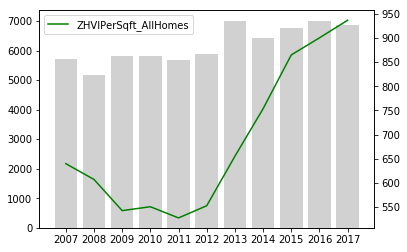

In [8]:
selected_new_df = new_df[new_df.CityState_x == "San Francisco, CA"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(selected_new_df['Year'], selected_new_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(selected_new_df['Year'], selected_new_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')

ax.set_xticklabels(selected_new_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()

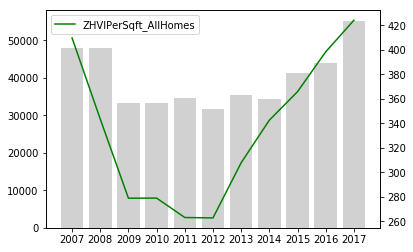

In [9]:
selected_new_df = new_df[new_df.CityState_x == "Los Angeles, CA"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(selected_new_df['Year'], selected_new_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(selected_new_df['Year'], selected_new_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')

ax.set_xticklabels(selected_new_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()

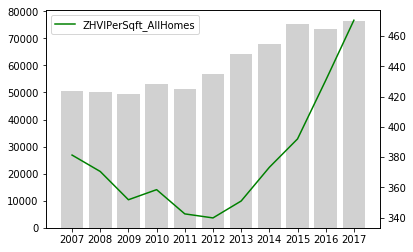

In [10]:
selected_new_df = new_df[new_df.CityState_x == "New York, NY"]

#ax = selected_new_df[['Year', 'ZHVIPerSqft_AllHomes']].plot(x='Year', linestyle='-', marker='o')
#selected_new_df[['Year', 'Total Homeless']].plot(x='Year', kind='bar', ax=ax)

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(selected_new_df['Year'], selected_new_df["Total Homeless"], color=(190/255,190/255,190/255,0.7), label='Total Homeless')

ax2.plot(selected_new_df['Year'], selected_new_df["ZHVIPerSqft_AllHomes"], color='green', label='ZHVIPerSqft_AllHomes')

ax.set_xticklabels(selected_new_df['Year'])

#ax.legend(loc='best')
ax2.legend(loc='best')

plt.show()